# 3D stack of grids

In [1]:
import os

import geopandas as gpd

from polartoolkit import fetch, maps, regions

In [2]:
# set default to southern hemisphere for this notebook
os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

load some grids (from the bottom up)

In [3]:
region = regions.ross_ice_shelf

bed = fetch.bedmap2(layer="bed", region=region)
icebase = fetch.bedmap2(layer="icebase", region=region)
surface = fetch.bedmap2(layer="surface", region=region)

grids = [bed, icebase, surface]

make the initial plot

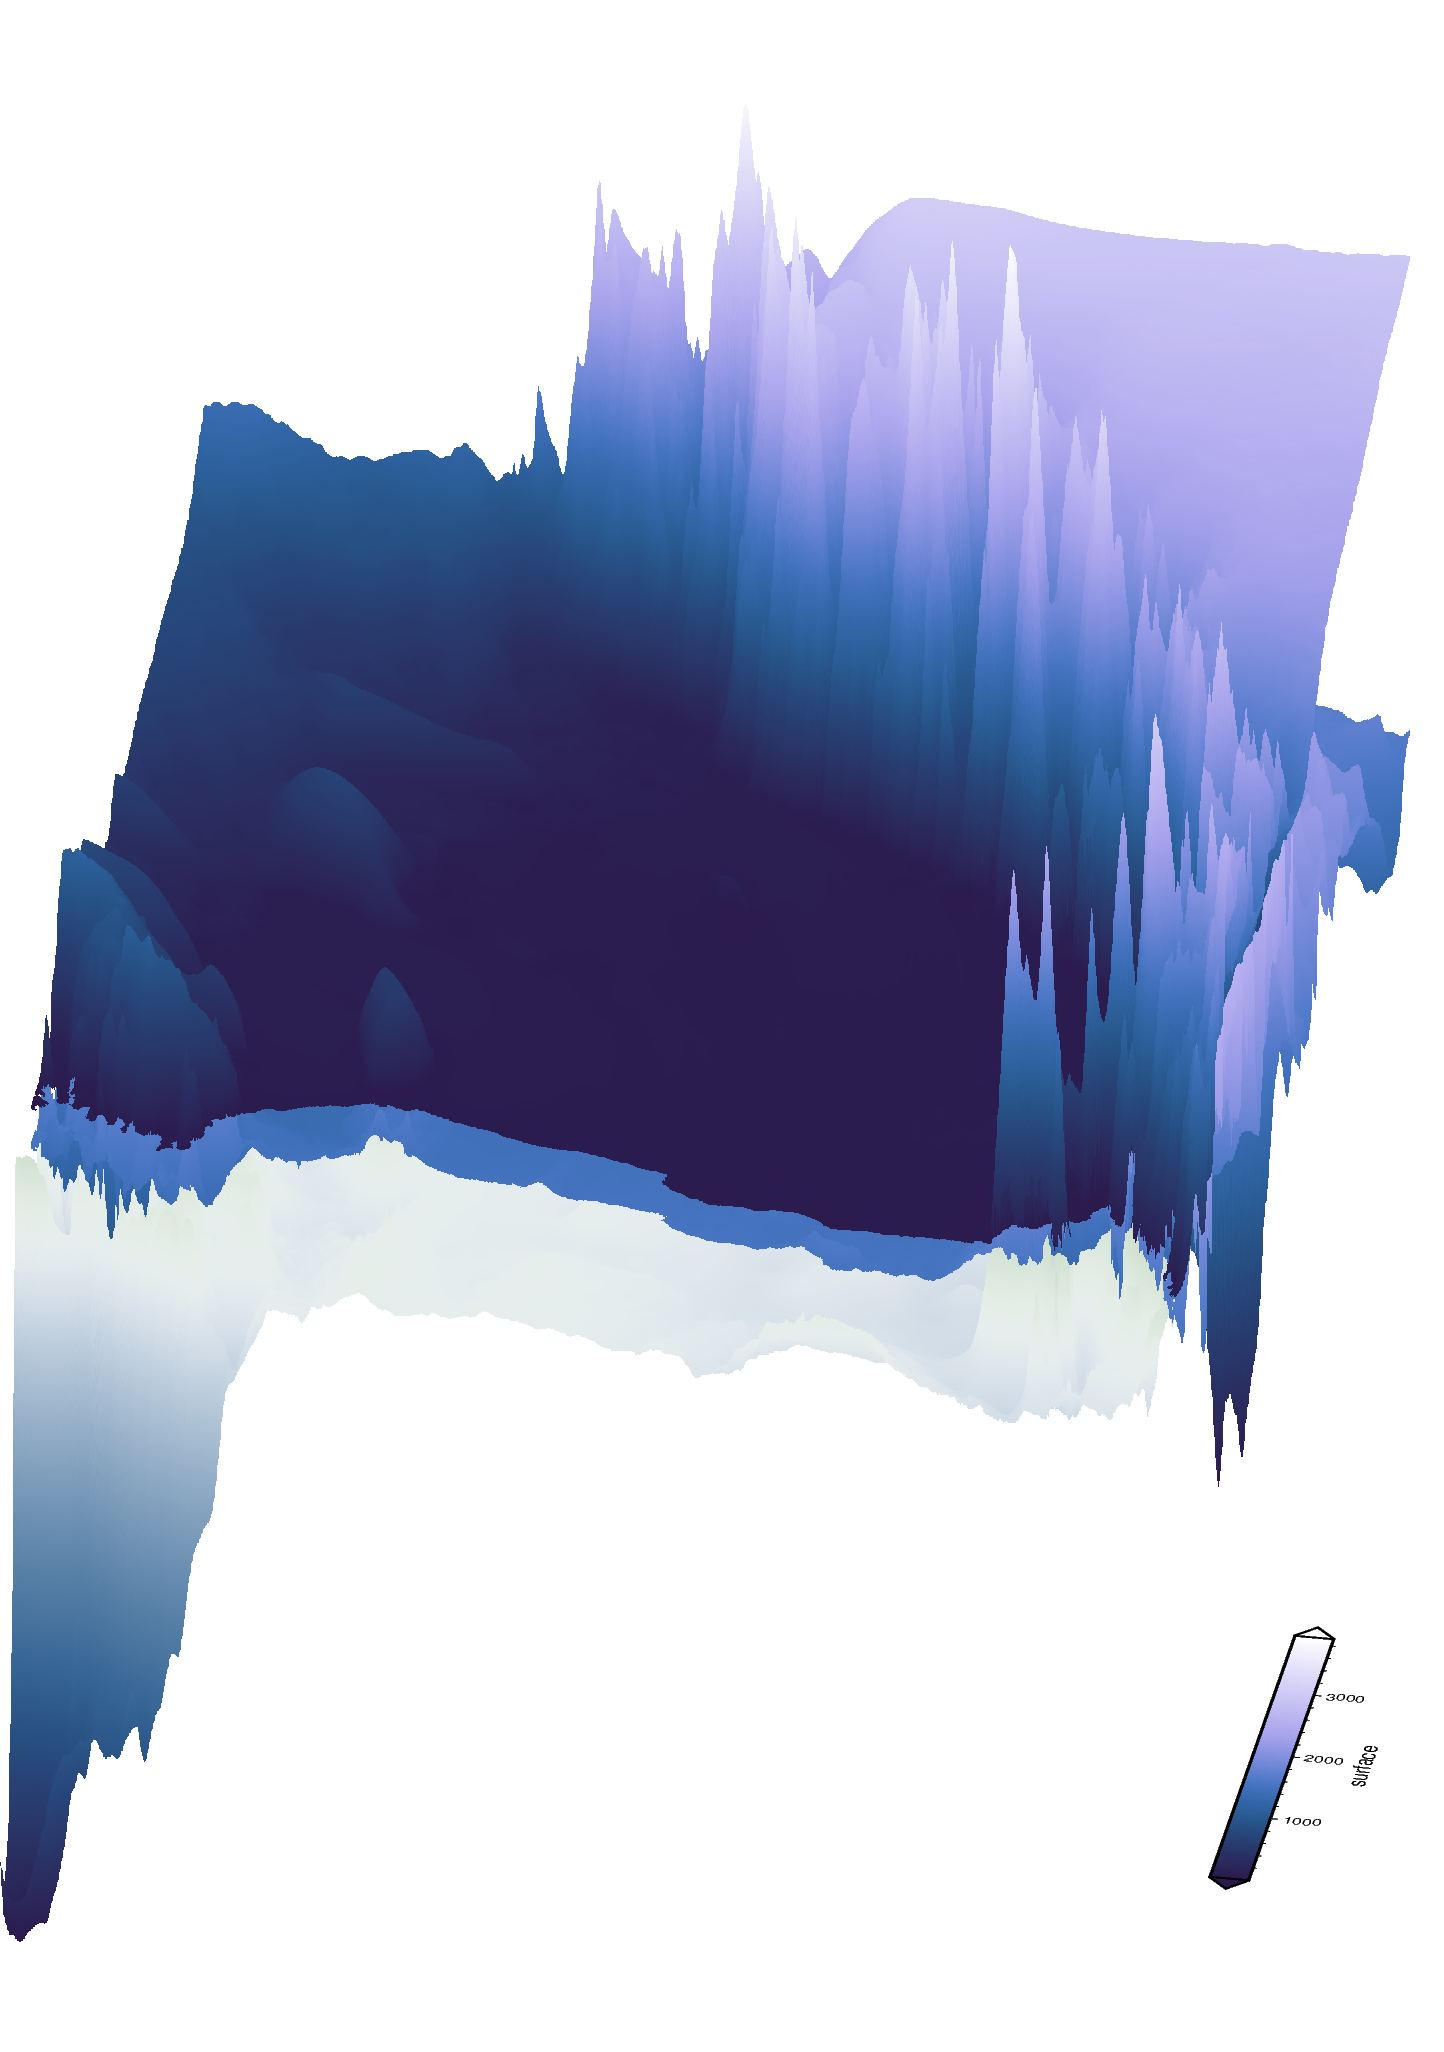

In [4]:
fig = maps.plot_3d(
    grids=grids,
    cmaps=["cork", "devon", "devon"],
    exaggeration=[20, 20, 20],
    cbar_labels=["bed", "icebase", "surface"],
)
fig.show(dpi=200)

## Add a shapefile to mask the grids, and fine tune the layout

Make a smoothed outline of the Ross Ice Shelf

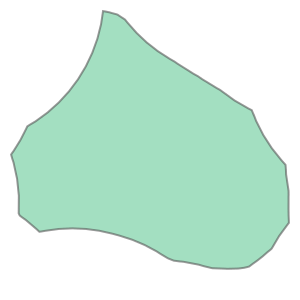

In [5]:
# fetch MEaSURES iceshelf shapefiles
measures_shelves = fetch.antarctic_boundaries(version="IceShelf")

# read into a geodataframe
ice_shelves = gpd.read_file(measures_shelves)

# extract Ross Ice Shelf east and west polygons
RIS_separate = ice_shelves[ice_shelves.NAME.isin(["Ross_West", "Ross_East"])]

# merge into 1 polygon
RIS = RIS_separate.dissolve()

smooth_RIS = RIS.buffer(500e3, join_style=1).buffer(-520e3, join_style=1)
smooth_RIS.geometry[0]

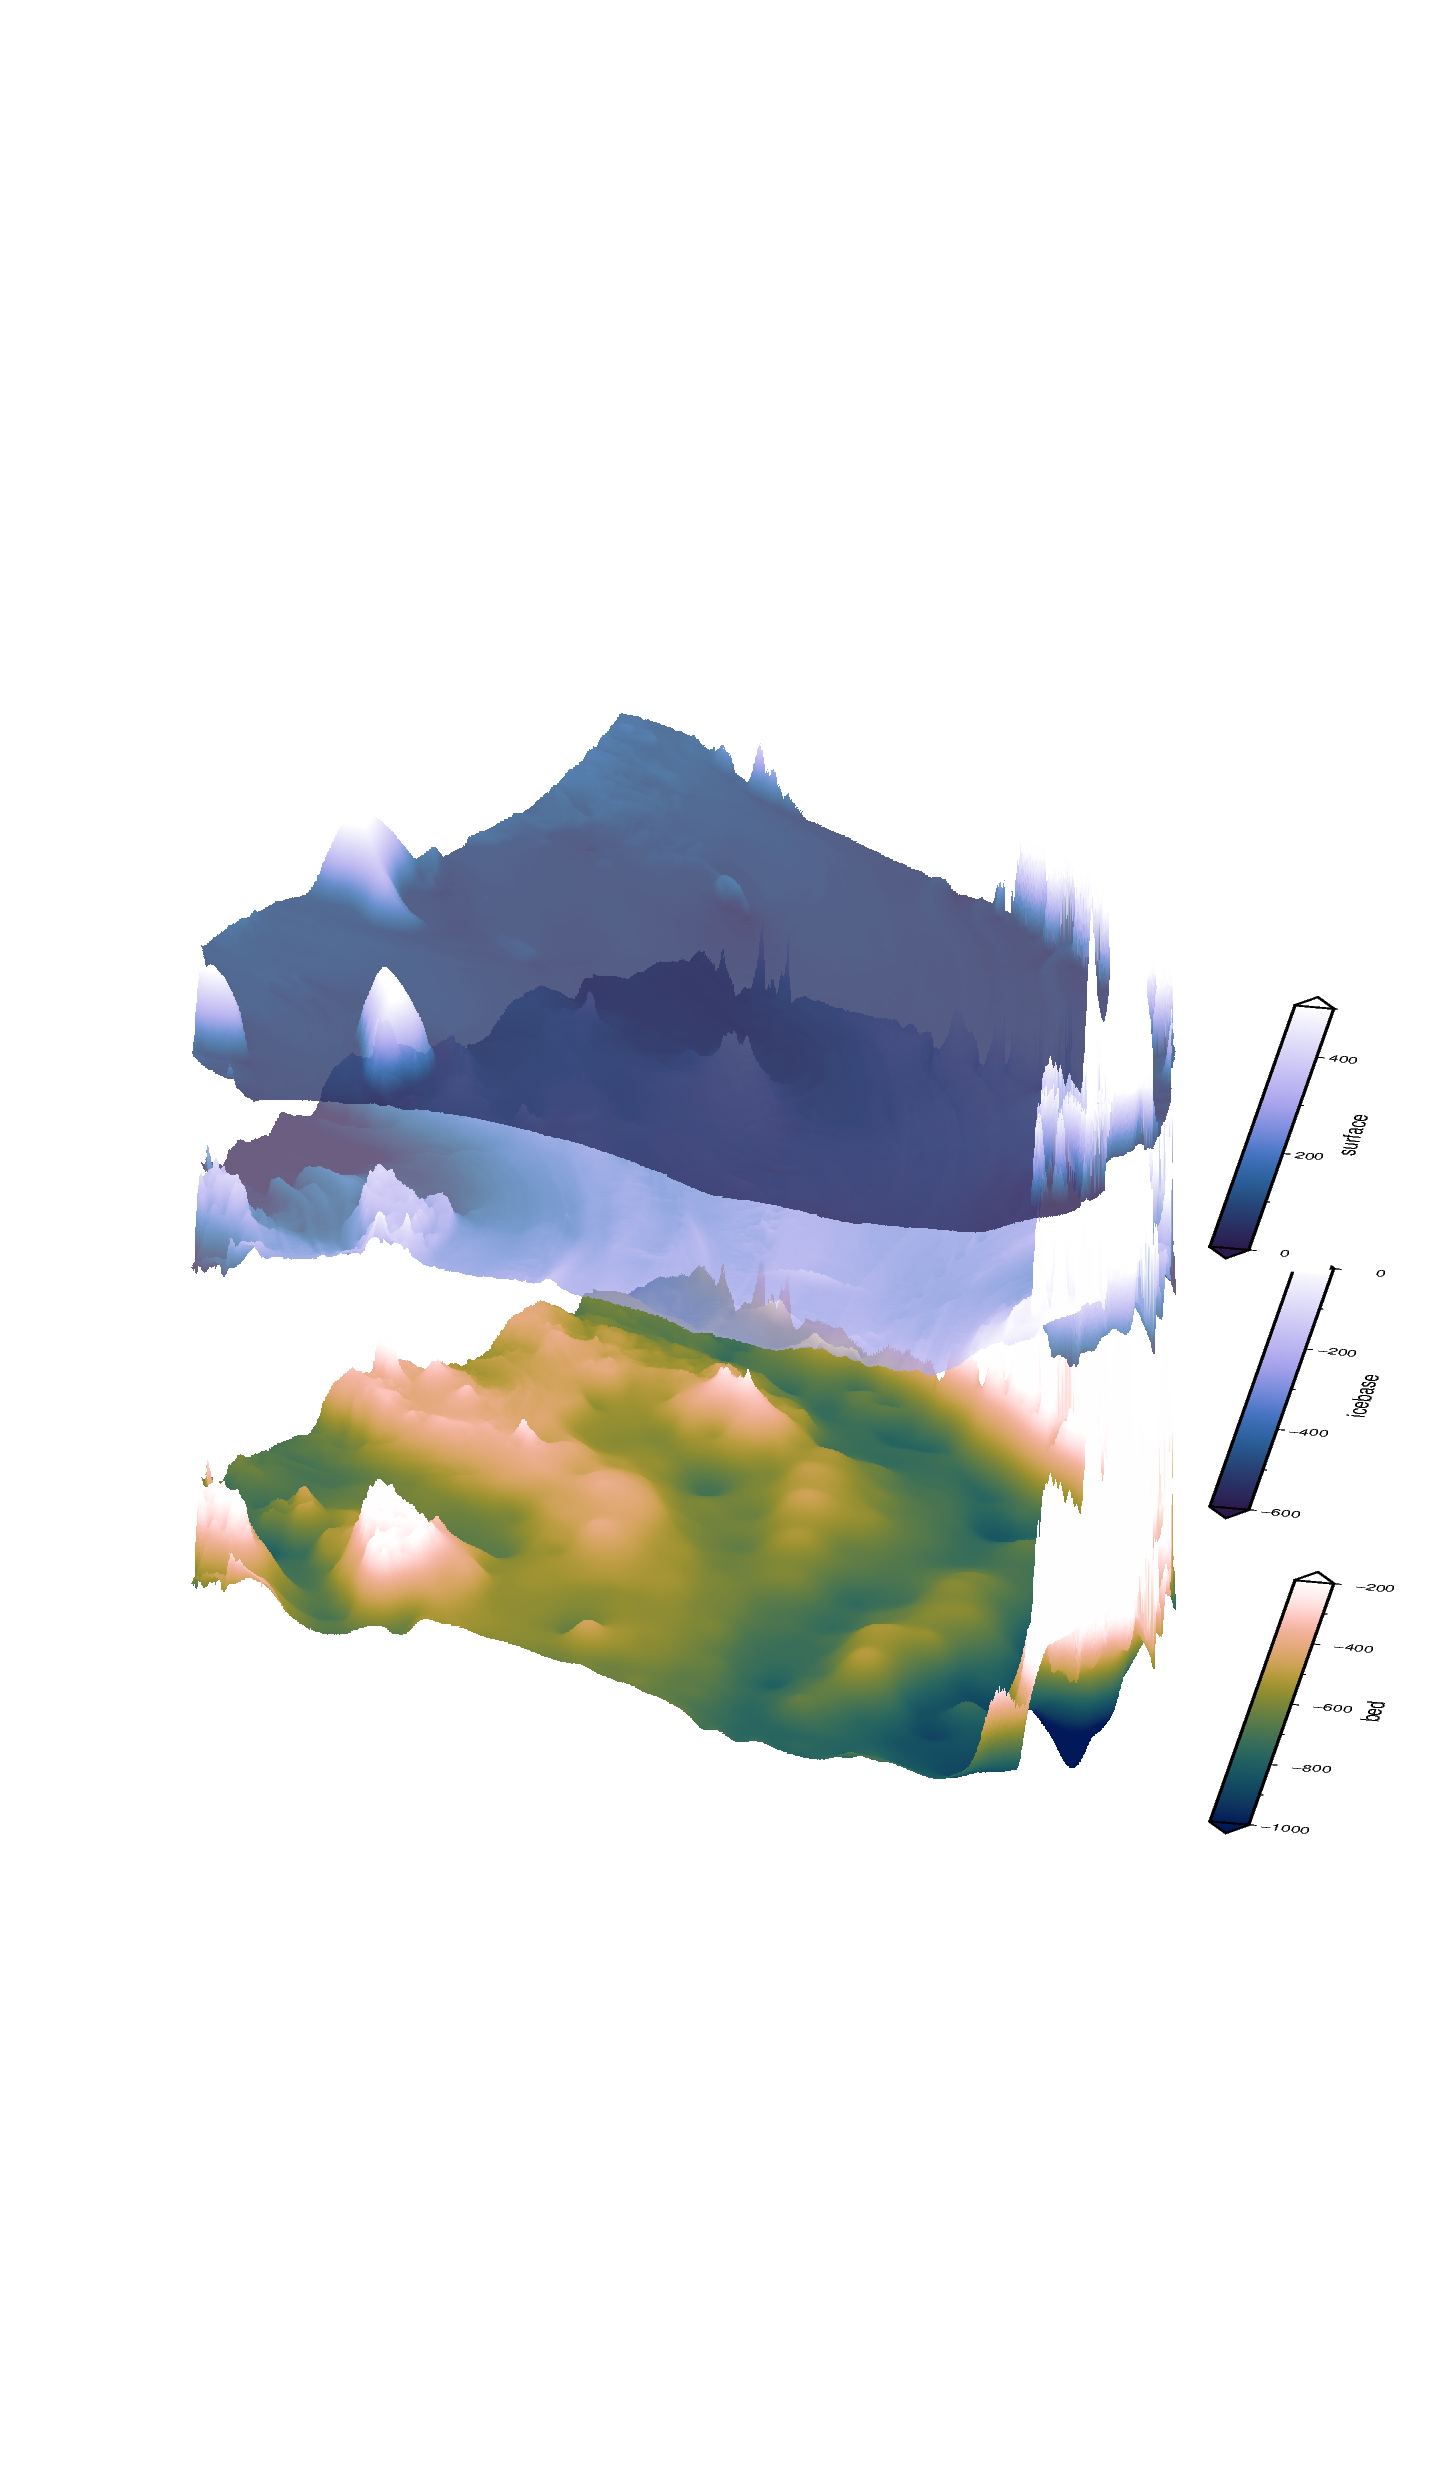

In [6]:
fig = maps.plot_3d(
    grids=grids,
    cmaps=["batlowW", "devon", "devon"],
    exaggeration=[20, 20, 20],
    cbar_labels=["bed", "icebase", "surface"],
    shp_mask=smooth_RIS,
    region=region,
    cbar_yshift=[6, 6, 8],
    zshifts=[4, 1.3, 0.5],
    transparencies=[0, 30, 20],
    cpt_lims=[(-1000, -200), (-600, 0), (0, 500)],
    grd2cpt=False,
)
fig.show(dpi=200)

See the map tutorial walkthrough for examples of interactively creating a custom shapefile to use for the masking